<a href="https://colab.research.google.com/github/PranavDscientist/Weight-prediction-for-self-checkout-app/blob/main/latest_img_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import PIL
from keras.layers import Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.preprocessing.image import ImageDataGenerator
from PIL import Image

I_SIZE = [224, 224]

# Load VGG16 model
vgg = VGG16(input_shape=I_SIZE + [3], weights='imagenet', include_top=False)

# Freeze layers
for layer in vgg.layers:
    layer.trainable = False

# Build the model
x = Flatten()(vgg.output)
prediction = Dense(4, activation='softmax')(x)
model = Model(inputs=vgg.input, outputs=prediction)

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Image data generators
train_datagen = ImageDataGenerator(rescale=1/255, zoom_range=0.2, horizontal_flip=True, shear_range=0.2)
test_datagen = ImageDataGenerator(rescale=1/255)

train_path = '/content/drive/MyDrive/trainsett'
test_path = '/content/drive/MyDrive/testsett'
# Preprocess training set
for root, dirs, files in os.walk(train_path):
    for file in files:
        file_path = os.path.join(root, file)
        try:
            # Try to open and save the image
            with Image.open(file_path) as img:
                img.save(file_path)
        except (OSError, PIL.UnidentifiedImageError) as e:
            # Handle the error (print a message, remove the file, etc.)
            print(f"Error processing image {file_path}: {e}")
            os.remove(file_path)

# Preprocess test set
for root, dirs, files in os.walk(test_path):
    for file in files:
        file_path = os.path.join(root, file)
        try:
            # Try to open and save the image
            with Image.open(file_path) as img:
                img.save(file_path)
        except (OSError, PIL.UnidentifiedImageError) as e:
            # Handle the error (print a message, remove the file, etc.)
            print(f"Error processing image {file_path}: {e}")
            os.remove(file_path)

# Image data generators after preprocessing
training_set = train_datagen.flow_from_directory(train_path, target_size=(224, 224), batch_size=32, class_mode='sparse')
test_set = test_datagen.flow_from_directory(test_path, target_size=(224, 224), batch_size=32, class_mode='sparse')

# Train the model using the fit method
try:
    r = model.fit(training_set, validation_data=test_set, epochs=5)
except Exception as e:
    print(f"Error during training: {e}")

58889256/58889256 [==============================] - 0s 0us/step
Found 898 images belonging to 4 classes.
Found 275 images belonging to 4 classes.
Epoch 1/5
29/29 [==============================] - 37s 973ms/step - loss: 0.8568 - accuracy: 0.6670 - val_loss: 0.5455 - val_accuracy: 0.7600
Epoch 2/5
29/29 [==============================] - 19s 671ms/step - loss: 0.2705 - accuracy: 0.8998 - val_loss: 0.3768 - val_accuracy: 0.8691
Epoch 3/5
29/29 [==============================] - 20s 676ms/step - loss: 0.1985 - accuracy: 0.9298 - val_loss: 0.4468 - val_accuracy: 0.8218
Epoch 4/5
29/29 [==============================] - 20s 673ms/step - loss: 0.1532 - accuracy: 0.9488 - val_loss: 0.3591 - val_accuracy: 0.8873
Epoch 5/5
29/29 [==============================] - 20s 674ms/step - loss: 0.1030 - accuracy: 0.9710 - val_loss: 0.3713 - val_accuracy: 0.8873


In [ ]:
categories=['bottle','glass','plastic','unknown']

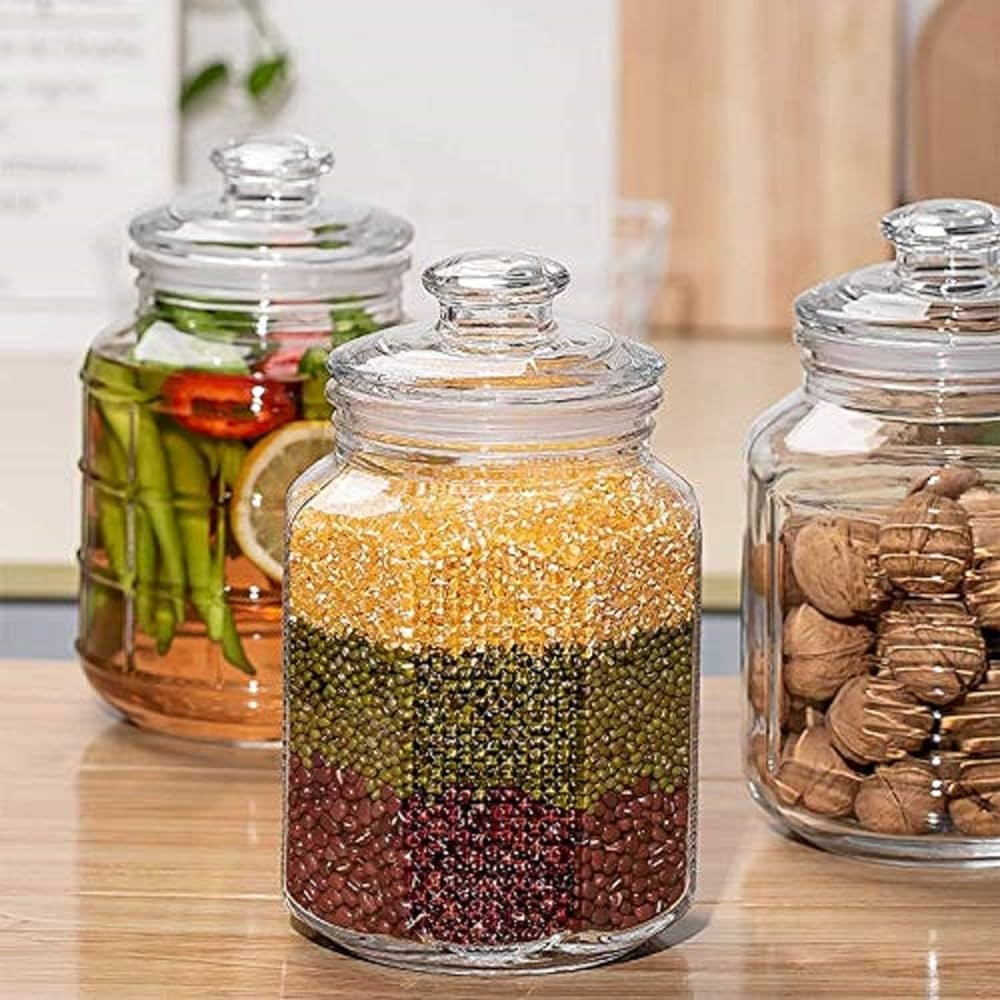

1/1 [==============================] - 0s 38ms/step
Raw Predictions: [[0. 1. 0. 0.]]
Class: glass, Confidence: 1.0


In [ ]:
import cv2
from google.colab.patches import cv2_imshow
from skimage import io
import requests
from PIL import Image
import numpy as np
def predict_image(input_path, model, categories, confidence_threshold=0.5):
    if input_path.startswith(('http://', 'https://')):
        try:
            # Fetch image from URL using skimage.io
            image = io.imread(input_path)
            cv2_imshow(cv2.cvtColor(image, cv2.COLOR_RGB2BGR))
            image_resized = cv2.resize(image, (224, 224))
            image = image_resized.reshape(1, 224, 224, 3)
            pred = model.predict(image)
            print("Raw Predictions:", pred)  # Print raw predictions for debugging
            confidence = np.max(pred)
            if confidence >= confidence_threshold:
                ind = np.argmax(pred)
                print(f"Class: {categories[ind]}, Confidence: {confidence}")
            else:
                print("Image does not belong to any of the specified classes.")
        except Exception as e:
            print(f"Error processing image from URL: {e}")
    else:
        try:
            # Local file path
            image = cv2.imread(input_path)
            cv2_imshow(image)
            image_resized = cv2.resize(image, (224, 224))
            image = image_resized.reshape(1, 224, 224, 3)
            pred = model.predict(image)
            print("Raw Predictions:", pred)  # Print raw predictions for debugging
            confidence = np.max(pred)
            if confidence >= confidence_threshold:
                ind = np.argmax(pred)
                print(f"Class: {categories[ind]}, Confidence: {confidence}")
            else:
                print("Image does not belong to any of the specified classes.")
        except Exception as e:
            print(f"Error processing local image: {e}")

# Example usage with a confidence threshold of 0.7
image_path_or_url = 'https://m.media-amazon.com/images/I/71+k42eKI6L._AC_UF1000,1000_QL80_.jpg'
predict_image(image_path_or_url, model, categories, confidence_threshold=0.5)


In [ ]:
# image_path_or_url = 'https://static.libertyprim.com/files/familles/pomme-large.jpg?1569271834'  # Replace this with your image URL or local file path
# predict_image(image_path_or_url,model)

In [ ]:
model.save('newurl_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
